# Different neural networks

_18 August 2021_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

This version uses more complex neural networks than the very simple versions we used originally.

- For the Fashion-MNIST dataset, this uses a convolutional neural network.
- For the CIFAR-10 dataset, this uses the ResNet architecture proposed in this paper: https://arxiv.org/abs/1512.03385 (He, Zhang, Ren and Sun, "Deep Residual Learning for Image Recognition")

These networks were added in commit [`f412d14`](https://github.com/czlee/jadeite/commit/f412d14ac1a97ae8e0917f8f7ea70acb05e6e754).

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from plots_utils import plot_averaged_training_charts, plot_comparison, make_axes, show_timestamp_info

In [2]:
def get_comparison_specs(dataset, noise='__all__'):

    common_fixed_specs = {
        'rounds': 150,
        'batch_size': 64,
        'epochs': 1,
        'ema_coefficient': 1 / 3,
        'data_per_client': None,
        'save_squared_error': False,
        'send': 'deltas',
    }

    fixed_specs = common_fixed_specs.copy()
    fixed_specs.update({
        'power_update_period': 1,
        'power_quantile': 0.9,
        'power_factor': 0.9,
    })
    title_specs = {
        'power': 1.0,
        'clients': 20,
        'dataset': dataset,
        'lr_client': 0.001 if dataset.startswith('cifar10') else 0.01,
        'momentum_client': 0.9 if dataset.startswith('cifar10') else 0.0,
    }
    series_specs = {
        'noise': noise,
    }

    all_analog_specs = title_specs, fixed_specs, series_specs

    fixed_specs = common_fixed_specs.copy()
    fixed_specs.update({
        'qrange_update_period': 1,
        'qrange_param_quantile': 0.9,
        'qrange_client_quantile': 0.9,
        'channel_uses': None,
        'rounding_method': 'stochastic',
        'parameter_schedule': 'staggered',
        'zero_bits_strategy': 'read-zero',
    })

    all_digital_specs = title_specs, fixed_specs, series_specs
    
    return all_analog_specs, all_digital_specs

def _plot_comparisons(field, paths, all_specs, zoom_ylim=None, **kwargs):
    axs = make_axes(2, axsize=(11, 7))
    plot_comparison(field, *paths, *all_specs, ax=axs[0], **kwargs)
    axs[0].grid()
    plot_comparison(field, *paths, *all_specs, ax=axs[1], **kwargs)
    axs[1].set_ylim(zoom_ylim)
    axs[1].grid()

def plot_analog_vs_digital(paths, dataset, noise='__all__', field='accuracy', zoom_ylim=None, **kwargs):
    all_specs = get_comparison_specs(dataset, noise)
    _plot_comparisons(field, paths, all_specs, zoom_ylim=zoom_ylim, **kwargs)

# Fashion-MNIST

In [3]:
analog_path = [
    Path("results/20210817-fmnist-convnet-dynpower-popeye1/"),
    Path("results/20210817-fmnist-convnet-dynpower-popeye2/"),
]
digital_path = [
    Path("results/20210817-fmnist-convnet-dynquant-popeye1/"),
    Path("results/20210817-fmnist-convnet-dynquant-popeye2/"),
]
paths = analog_path, digital_path

In [4]:
show_timestamp_info(analog_path)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **17 Aug 2021, 17:56:38** | 17 Aug 2021, 18:44:32 | 47 min 54 s |
| last to finish | 18 Aug 2021, 13:13:11 | **18 Aug 2021, 14:18:39** | 1 h 05 min 28 s |
| shortest | 18 Aug 2021, 06:38:23 | 18 Aug 2021, 07:02:23 | **24 min 00 s** |
| longest | 18 Aug 2021, 04:10:57 | 18 Aug 2021, 05:24:04 | **1 h 13 min 06 s** |


In [5]:
show_timestamp_info(digital_path)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **17 Aug 2021, 17:56:38** | 17 Aug 2021, 18:48:16 | 51 min 38 s |
| last to finish | 18 Aug 2021, 14:06:13 | **18 Aug 2021, 15:10:55** | 1 h 04 min 41 s |
| shortest | 18 Aug 2021, 07:17:42 | 18 Aug 2021, 07:40:27 | **22 min 44 s** |
| longest | 18 Aug 2021, 05:51:12 | 18 Aug 2021, 07:09:04 | **1 h 17 min 52 s** |


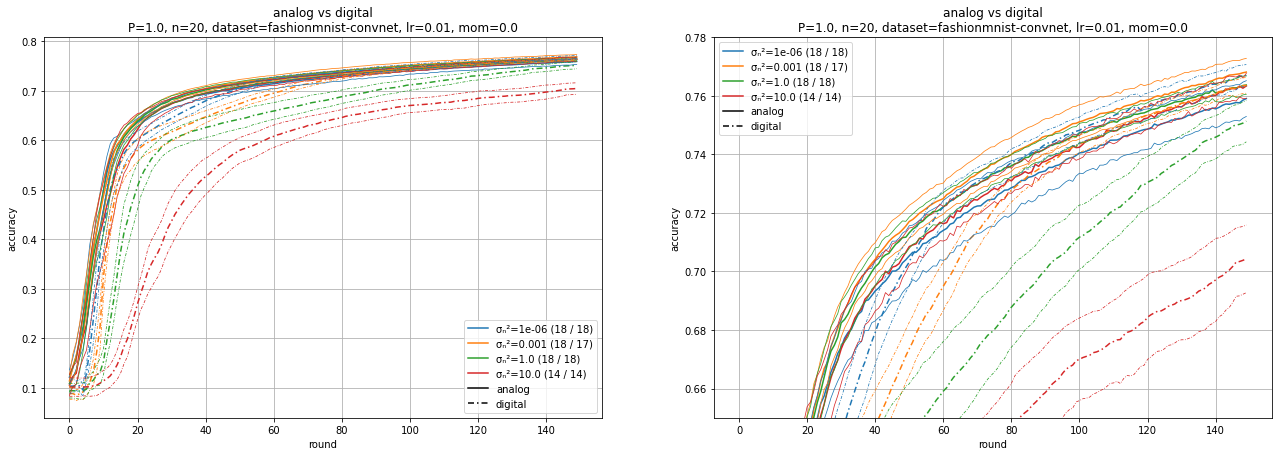

In [6]:
plot_analog_vs_digital(paths, 'fashionmnist-convnet', plot_confints=True, zoom_ylim=(0.65, 0.78), noise=[1e-6, 1e-3, 1.0, 10.0])

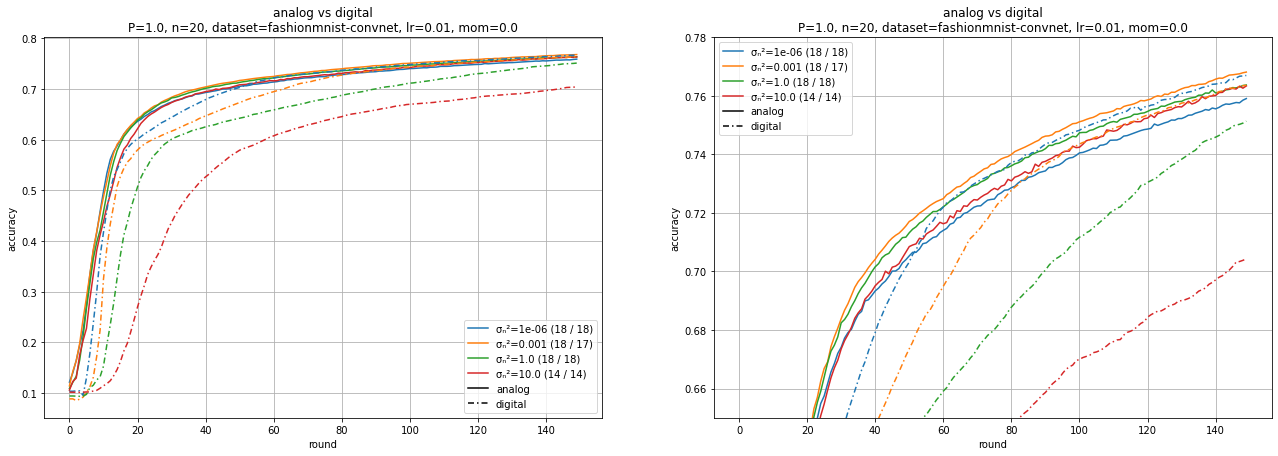

In [7]:
plot_analog_vs_digital(paths, 'fashionmnist-convnet', zoom_ylim=(0.65, 0.78), noise=[1e-6, 1e-3, 1.0, 10.0])

# CIFAR-10

In [8]:
analog_path = [
    Path("results/20210817-cifar10-resnet-dynpower-popeye2/"),
]
digital_path = [
    Path("results/20210817-cifar10-resnet-dynquant-popeye2/"),
]
paths = analog_path, digital_path

In [9]:
show_timestamp_info(analog_path)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **17 Aug 2021, 18:52:18** | 17 Aug 2021, 21:45:18 | 2 h 52 min 59 s |
| last to finish | 17 Aug 2021, 18:52:53 | **17 Aug 2021, 21:45:27** | 2 h 52 min 33 s |
| shortest | 17 Aug 2021, 18:52:18 | 17 Aug 2021, 21:44:49 | **2 h 52 min 31 s** |
| longest | 17 Aug 2021, 18:52:18 | 17 Aug 2021, 21:45:18 | **2 h 52 min 59 s** |


In [10]:
show_timestamp_info(digital_path)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **17 Aug 2021, 18:52:02** | 17 Aug 2021, 21:48:48 | 2 h 56 min 46 s |
| last to finish | 17 Aug 2021, 18:52:02 | **17 Aug 2021, 21:49:51** | 2 h 57 min 48 s |
| shortest | 17 Aug 2021, 18:52:02 | 17 Aug 2021, 21:48:48 | **2 h 56 min 46 s** |
| longest | 17 Aug 2021, 18:52:02 | 17 Aug 2021, 21:49:51 | **2 h 57 min 48 s** |


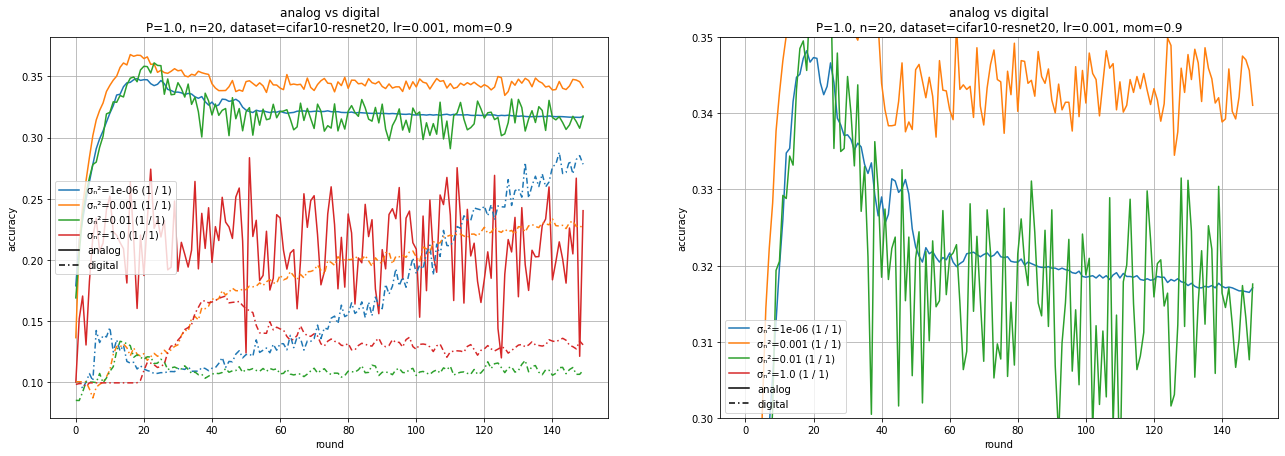

In [11]:
# only one sample, confidence intervals don't make sense
plot_analog_vs_digital(paths, 'cifar10-resnet20', plot_confints=False, zoom_ylim=(0.30, 0.35))

Ermmm, that looks wrong.

# CIFAR-10 with a softmax on the output

The rTop-k code did this, but there's no softmax in the implementation at https://github.com/akamaster/pytorch_resnet_cifar10/.

In [12]:
analog_path = [
    Path("results/20210817-cifar10-resnet-softmax-dynpower-popeye1/"),
    Path("results/20210817-cifar10-resnet-softmax-dynpower-popeye2/"),
]
digital_path = [
    Path("results/20210817-cifar10-resnet-softmax-dynquant-popeye1/"),
    Path("results/20210817-cifar10-resnet-softmax-dynquant-popeye2/"),
]
paths = analog_path, digital_path

In [13]:
show_timestamp_info(analog_path)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **17 Aug 2021, 22:29:00** | 18 Aug 2021, 03:04:12 | 4 h 35 min 11 s |
| last to finish | 18 Aug 2021, 16:38:03 | **18 Aug 2021, 20:24:22** | 3 h 46 min 19 s |
| shortest | 17 Aug 2021, 22:29:15 | 18 Aug 2021, 01:26:52 | **2 h 57 min 37 s** |
| longest | 18 Aug 2021, 03:04:12 | 18 Aug 2021, 07:58:37 | **4 h 54 min 25 s** |


In [14]:
show_timestamp_info(digital_path)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **17 Aug 2021, 22:27:50** | 18 Aug 2021, 03:10:08 | 4 h 42 min 18 s |
| last to finish | 18 Aug 2021, 17:05:25 | **18 Aug 2021, 20:41:30** | 3 h 36 min 05 s |
| shortest | 17 Aug 2021, 22:28:44 | 18 Aug 2021, 01:33:03 | **3 h 04 min 18 s** |
| longest | 18 Aug 2021, 03:10:08 | 18 Aug 2021, 08:12:59 | **5 h 02 min 51 s** |


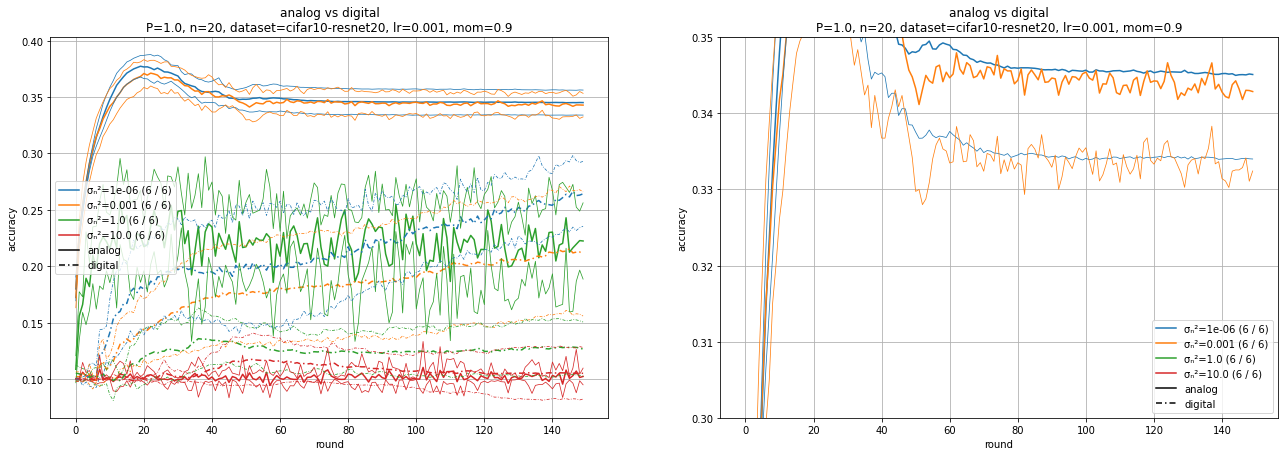

In [15]:
plot_analog_vs_digital(paths, 'cifar10-resnet20', plot_confints=True, zoom_ylim=(0.30, 0.35))